In [ ]:
from matplotlib import pyplot as plt

What does this data dump look like? It consists of a list of users, each represented by a dict that contains for each user his or her id (which is a number) and name (which, in one of the great cosmic coincidences, rhymes with the user’s id):

In [ ]:
##########################
#                        #
# FINDING KEY CONNECTORS #
#                        #
##########################

users = [
    { "id": 0, "name": "Hero" },
    { "id": 1, "name": "Dunn" },
    { "id": 2, "name": "Sue" },
    { "id": 3, "name": "Chi" },
    { "id": 4, "name": "Thor" },
    { "id": 5, "name": "Clive" },
    { "id": 6, "name": "Hicks" },
    { "id": 7, "name": "Devin" },
    { "id": 8, "name": "Kate" },
    { "id": 9, "name": "Klein" },
    { "id": 10, "name": "Jen" }
]

He also gives you the “friendship” data, represented as a list of pairs of IDs:

In [ ]:
friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

For example, the tuple (0, 1) indicates that the data scientist with id 0 (Hero) and the data scientist with id 1 (Dunn) are friends. The network is illustrated:

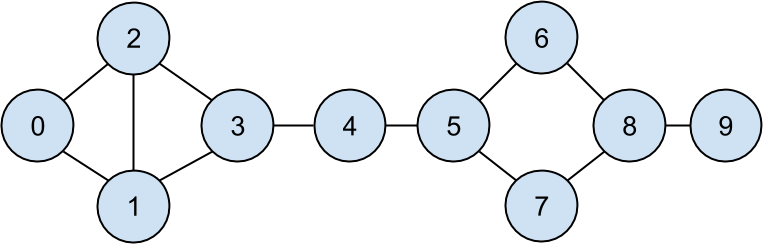

In [ ]:
# first give each user an empty list
for user in users:
    user["friends"] = []

In [ ]:
# and then populate the lists with friendships
for i, j in friendships:
    # this works because users[i] is the user whose id is i
    users[i]["friends"].append(users[j]) # add i as a friend of j
    users[j]["friends"].append(users[i]) # add j as a friend of i

Once each user dict contains a list of friends, we can easily ask questions of our graph, like “what’s the average number of connections?”

First we find the total number of connections, by summing up the lengths of all the friends lists:

In [ ]:
def number_of_friends(user):
    """how many friends does _user_ have?"""
    return len(user["friends"]) # length of friend_ids list

total_connections = sum(number_of_friends(user)
                        for user in users) # 24


And then we just divide by the number of users:

In [ ]:
num_users = len(users)
avg_connections = total_connections / num_users # 2.4

Data Scientists You May Know

While you’re still filling out new-hire paperwork, the VP of Fraternization comes by your desk. She wants to encourage more connections among your members, and she asks you to design a “Data Scientists You May Know” suggester.

Your first instinct is to suggest that a user might know the friends of friends. These are easy to compute: for each of a user’s friends, iterate over that person’s friends, and collect all the results:

In [ ]:
################################
#                              #
# DATA SCIENTISTS YOU MAY KNOW #
#                              #
################################

def friends_of_friend_ids_bad(user):
    # "foaf" is short for "friend of a friend"
    return [foaf["id"]
            for friend in user["friends"] # for each of user's friends
            for foaf in friend["friends"]] # get each of _their_ friends

When we call this on users[0] (Hero), it produces:

In [ ]:
users[0]